<font size=18>Homework 05: Local Optimization</font>



## Questions 1-3



The management of the Albert Hanson Company is trying to determine the best product mix for two new products. Because these products would share the same production facilities, the total number of units produced of the two products combined cannot exceed two per hour. Because of uncertainty about how well these products will sell, the profit from producing each product provides decreasing marginal returns as the production rate is increased. In particular, with a production rate of $R_1$ units per hour, it is estimated that Product 1 would provide a profit (in dollars per hour) of $200 R_1 - 100 R_1^2.$ If the production rate of product 2 is $R_2$ units per hour, its estimated profit (in dollars per hour) would be $300 R_2 - 100 R_2^2.$

### Question 1 <font color="magenta">(8 points, manual)</font>

Formulate a quadratic programming model and solve it using Pyomo with the ipopt solver.  Put your complete code below and in your CoCalc notebook.  We are allowing fractional solutions here, so this is not an integer programming problem.

In [1]:
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="Product_mix")

products = ['r1', 'r2']

model.x = Var(products, domain=NonNegativeReals)

# Objective
model.profit = Objective(expr=300.0 * model.x['r2'] -
                         100.0 * model.x['r2']**2 + 200.0 * model.x['r1'] -
                         100.0 * model.x['r1']**2,
                         sense=maximize)

# Constraints
model.constraint = Constraint(
    expr=model.x['r1'] + model.x['r2'] <= 2)

# Solve
solver = SolverFactory('ipopt')
solver.solve(model)

# display solution
print(f"Hourly profit = ${model.profit():,.2f}")
print(f"Number of R1 = {model.x['r1']():1.2f}")
print(f"Number of R2 = {model.x['r2']():1.2f}")

Hourly profit = $312.50
Number of R1 = 0.75
Number of R2 = 1.25


### Question 2 <font color="magenta">(1 point, auto)</font>

Enter the maximum value of the profit to two decimal places.

**312.50**

### Question 3 <font color="magenta">(1 point, auto)</font>

To achieve the maximum value of the profit function, how many units of product 2 should be introduced each hour?  Enter your answer to two decimal places.

**1.25**


## Questions 4-7

Consider the nonconvex profit function $$p(x) = 100x^6 - 1359x^5 + 6836 x^4 - 15670 x^3 + 15870 x^2 - 5095 x$$
with $0 \leq x \leq 5.$


### Question 4  <font color="magenta">(2 points, manual)</font>

Graph the function for $0 \leq x \leq 5$ in your notebook and determine how many local minima there are.  Do not count endpoints.  Put your complete code to produce the graph below and in your CoCalc notebook.

Text(0, 0.5, 'y')

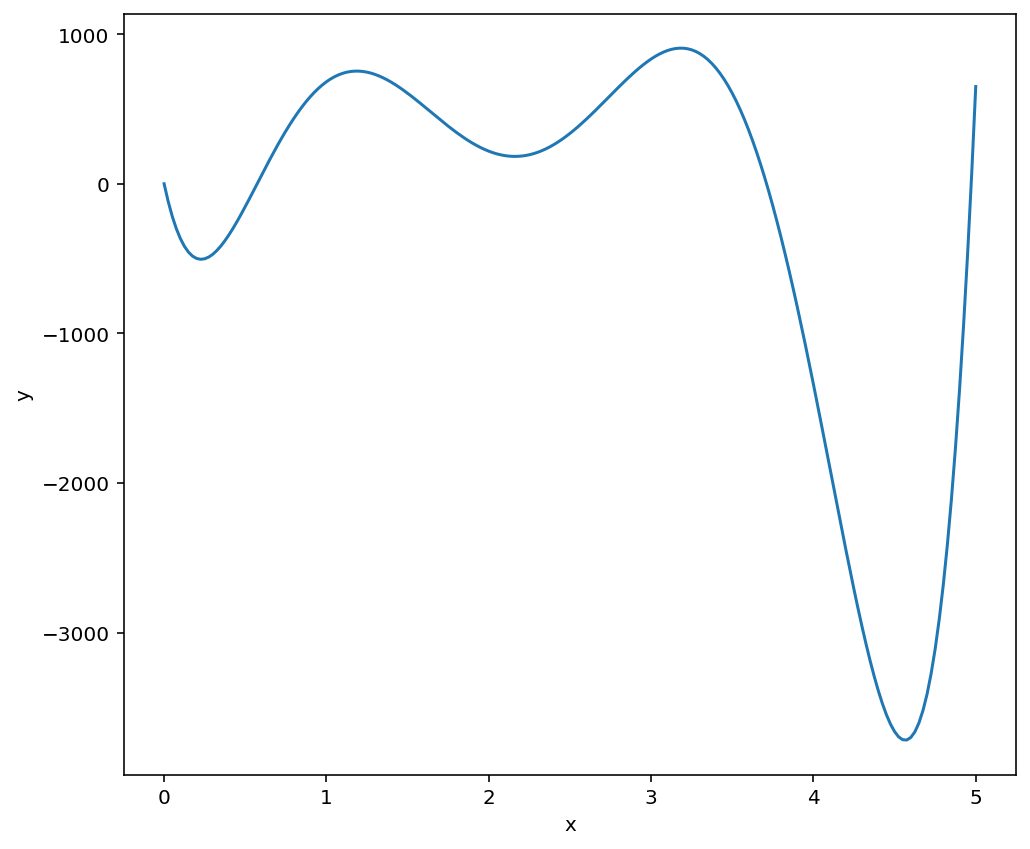

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0,5,201)
p = lambda x:100*x**6 - 1359*x**5 + 6836*x**4 - 15670*x**3 + 15870*x**2 - 5095 * x
fig = plt.figure(figsize=(8,7)) # adjust figsize if needed
plt.plot(x,p(x))
plt.xlabel('x')
plt.ylabel('y')

In [3]:
from scipy.optimize import minimize

#minima
x0_min = [.1,2,4.5]
for x0 in x0_min:
    result = minimize(p, x0, bounds = [(0,5)])
    print(f"There is a local minimum value of {result.fun[0]:.2f} at x = {result.x[0]:.2f}")
    
#maxima
neg_p = lambda x:-p(x)
x0_max = [1,3.2]
for x0 in x0_max:
    result = minimize(neg_p, x0, bounds = [(0,5)])
    print(f"There is a local maximum value of {-result.fun[0]:3.2f} at x = {result.x[0]:1.2f}")

There is a local minimum value of -504.75 at x = 0.23
There is a local minimum value of 183.07 at x = 2.16
There is a local minimum value of -3719.64 at x = 4.57
There is a local maximum value of 753.45 at x = 1.19
There is a local maximum value of 906.90 at x = 3.18


### Question 5 <font color="magenta">(1 point, auto)</font>

How many local minima are there? Do not count endpoints.

**There are 3 local minima**


### Question 6 <font color="magenta">(1 point, auto)</font>

What is the value of $p$ at the second-largest local maximum?  Enter your answer to two decimal places.

**753.45**


### Question 7 <font color="magenta">(4 points, manual)</font>

Write a multistart procedure that starts from uniform randomly sampled points in [0,5] to locate the absolute maximum value of profit. The algorithm should stop after 20 iterations in which no improvement in the max value has been obtained.  Include your code and the output from your code in the space below.  Your code should print out the max value and the x-value where it occurs.

In [4]:
from scipy.optimize import minimize
import numpy as np
import math

p = lambda x:100*x**6 - 1359*x**5 + 6836*x**4 - 15670*x**3 + 15870*x**2 - 5095 * x

def multistart_poly(some_function):
	neg_function = lambda x:-some_function(x)
	global_max = -math.inf
	max_x_val = None
	no_improve = 0
	while no_improve < 20:
		x_initial = np.random.uniform(0, 5)
		result = minimize(neg_p, x_initial, bounds=[(0,5)])
		if -result.fun[0] > global_max:
			global_max = -result.fun[0]
			max_x_val = result.x[0]
			no_improve = 0
		else:
			no_improve += 1
	return(global_max, max_x_val)

global_max = multistart_poly(p)
print(f'Global maximum of {global_max[0]:.2f} occurs at x = {global_max[1]:.2f}')

Global maximum of 906.90 occurs at x = 3.18


## Questions 8-10

To find the line of least squares fit of the form $\hat{y} = b_0 + b_1 x$ to fit data of the form $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$ we minimize a loss function.  The loss function is the sum of the squares residuals and only depends on $b_0$ and $b_1$ for fixed $xy$-data:

$$ SS(b_0,b_1) = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 = \sum_{i=1}^{n} \left( y_i - (b_0 + b_1 x_i) \right)^2 $$.

(Be sure to compute the squares before you compute the sum!)

The file age_height.csv contains ages (years) and heights (inches) for 7 children. Write Python code to evaluate the loss function (follow along with the logistic regression example while making suitable changes to the loss function) and use `minimize` to identify the coefficients of the line of least-squares fit for predicting height ($y$) from ($age$).  Include a scatter plot of the data that includes a plot of the line.

### Question 8 <font color="magenta">(10 points, manual)</font>

Include complete Python code in the space below that includes the loss function, shows how to minimize it, prints out the output, and makes a plot of the line on a scatterplot of the data.  You should also include your plot (<a href="https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/">check out savefig</a> or use a cropped screenshot).  The same elements should be in your CoCalc notebook.  Here is the loss function from the logistic regression problem in the lesson along with a couple of notes to get you started.

```python
def neg_log_loss( coef, *args): # rename your function
    b0 = coef[0]
    b1 = coef[1]
    x = args[0]
    y = args[1]
    
    # you'll need to change the code below here
    p = 1.0/(1.0 + np.exp(-(b0 + b1*x)))
    ll = sum( y*np.log(p)+(1-y)*np.log(1-p) )
    return(-ll) # log_loss needs to be MAXimized
```

Instead of `p` and `ll` compute `ss` the sum of the squares as shown in the formula above and then `return(ss)`.  Make sure you're computing the sum of the squared residuals and not the sum of the residuals squared ... parentheses matter!

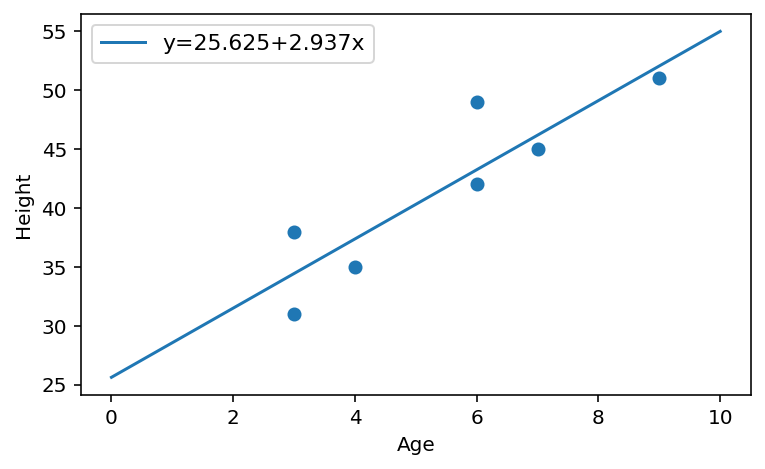

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/age_height.csv')

def sum_squares( coef, *args):
    b0 = coef[0]
    b1 = coef[1]
    x = args[0]
    y = args[1]
    
    p = (b0 + b1*x)
    ss = sum((y - p)**2)
    return(ss)

result = minimize(sum_squares,[0,0],args=(data.age,data.height))

b0 = result.x[0]
b1 = result.x[1]
age = np.linspace(0,10,100)
def line(x,intercept,slope):
    return(intercept + slope * x)
prob_height = line(age, b0, b1)

fig = plt.figure();
fig.set_size_inches(6,3.5)
ax = fig.add_subplot(111)
ax.scatter(data.age, data.height)
ax.plot(age, prob_height, label=f'y={b0:.3f}+{b1:.3f}x')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
plt.legend(fontsize=11)

### Question 9 <font color="magenta">(1 point, auto)</font>
What is the value of the intercept, $b_0$? Enter your answer to three decimal places.

**25.625**

### Question 10 <font color="magenta">(1 point, auto)</font>
What is the value of the slope, $b_1$? Enter your answer to three decimal places.

**2.937**

## Questions 11-12

The knapsack problem is a classical combinatorial optimization problem that will be good for practicing with the ideas of discrete local search and multistart.  Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.  In the 0-1 version of the knapsack problem, the decision variables are binary (or boolean) and represent whether to include each item in the collection.  We'll start with 20 items. You need to determine the collection of items that maximizes the value and keeps the total weight up to 50 (that is $\leq 50$).

In [6]:
# generate random weights and values for a knapsack problem (DO NOT CHANGE)
import numpy as np
num_items = 20
np.random.seed(seed=123)
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50
np.random.seed() # use system clock to reset the seed so future random numbers will appear random

The variables will be a vector of booleans of length `num_items`.  We could initialize a vector like this and then set the vector to include the 1st, 3rd, and 5th items:

In [7]:
x = np.zeros(num_items, dtype = bool)  # all false
x[[0,2,4]] = True
x

array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

The total weight of the items included in the collection:

In [8]:
tot_weight = sum( weights[x] )
tot_weight

11

The total value of the items included in the collection:

In [9]:
tot_value = sum( values[x] )
tot_value

68

Implement a local search where the search starts with no items included in the collection and generates new states (moves) by randomly choosing one of the booleans in the state vector and toggling it.  Like this:

In [10]:
# try executing this cell a few times and watch x change
bit_to_flip = np.random.randint(num_items)
x[bit_to_flip] = ~x[bit_to_flip]
x

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

Accept the state if the total weight is is $\leq 50$ and maximize the value by moving uphill

### Question 11 <font color="magenta">(4 points, manual)</font>

Write a local search algorithm that moves uphill until no improvements have been made in the last 1000 iterations.  Write the algorithm as a function with the values and weights as inputs and that returns the best collection of items to include as well as the value and weight of that collection.  Include your code and the results of running the code once in the space below.

In [11]:
import numpy as np
import math

def knapsack(values, weights):
	num_items = len(values)
	max_weight = 50
	max_value = -math.inf
	max_value_weight = 0
	no_improve = 0
	x = np.zeros(num_items, dtype = bool)  # all false
	while no_improve < 1000:
		tot_weight = sum( weights[x] )
		tot_value = sum( values[x] )
		if tot_weight <= 50 and tot_value > max_value:
			max_value = tot_value
			max_value_weight = tot_weight
			no_improve = 0
		else:
			no_improve += 1
		bit_to_flip = np.random.randint(num_items)
		x[bit_to_flip] = ~x[bit_to_flip]
		
	return([max_value, max_weight, x])

num_items = 20
np.random.seed(seed=123)
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
np.random.seed()

result = knapsack(values, weights)
print(f'Best solution has value of {result[0]} and weight of {result[1]}\n\nMembers:\n{result[2]}')

Best solution has value of 402 and weight of 50

Members:
[ True  True  True False False False False False  True False  True False
 False  True  True False  True  True  True  True]


## Question 12 <font color="magenta">(4 points, manual)</font>

Now write a loop to do 200 local searches (each with random moves starting from a collection with no items in it). Each local search should call the function you defined in Question 11. Clearly identify the best overall solution.  Put complete code to do the searches and display the best results in the space below and in your CoCalc notebook.  Do not print out information from each search, just the final results.

Next week we'll see some alternative search techniques that will generally enable us to find better solutions.

In [12]:
best_solution = None
for i in range(200):
	results = knapsack(values, weights)
	if best_solution is None:
		best_solution = results
	elif results[0] > best_solution[0]:
		best_solution = results

print(f'Best solution has value of {best_solution[0]} and weight of {best_solution[1]}\n\nMembers:\n{best_solution[2]}')

Best solution has value of 430 and weight of 50

Members:
[False False  True  True  True False False False  True  True False  True
 False False  True  True  True False  True False]


## Question 13 <font color="magenta">(2 points, manual)</font>

Enter the maximum total value for knapsack that you found in Question 12.  If it's not over 400 then something is likely wrong.

**430**

## Question 14 <font color="magenta">(10 points, manual)</font>

The Value Balancing Problem was a Self_Assessment problem near the end of the Lesson_05 notebook.  You can see our solution in the Self_Assessement_Soln notebook.  Use the locsearch package in this directory to find a local solution to the Value Balancing problem.  You can follow the example at the end of Lesson_05. We've copied some code from the lesson to get you started.  Remember to set this up so that your decision variables (the group assignments) are stored in the state attribute of your subclass.

```python
# the objective function
def group_fitness(groups, values):
    #set up a dataframe
    df = pd.DataFrame({'values': values, 'groups': groups})
    #get the maximum difference between groups
    maxDiff = df.groupby(groups).sum('values').set_index('groups').diff()['values'].abs().max()
    return abs(maxDiff)

# the move function
def change_group(groups, num_groups, debug=False):
    #get a copy of the groups
    new_groups = groups.copy()    
    #select item to change
    switch = np.random.randint(0, groups.shape[0])
    #select new group value
    new_group = np.random.randint(0,num_groups)
    while groups[switch] == new_group:
        new_group = np.random.randint(0,num_groups)
    new_groups[switch] = new_group
    if debug:
        print(f'The item at {switch} should change to {new_group}')
        print(f'The initial groups are: {groups} and the changed groups are {new_groups}')
       
    return new_groups
    
# problem data
num_groups = 4
num_items = 1000
np.random.seed(5)
values = np.random.randint(2,20,size=num_items)
np.random.seed()
```

In the space below, include your complete code to solve the Value Balancing problem using the LocalSearcher class.  You should also include output from a run of the code.  The same elements should be in your ÇoCalc notebook.

In [1]:
from locsearch import LocalSearcher
import pandas as pd
import numpy as np

# the objective function
def group_fitness(groups, values):
    #set up a dataframe
    df = pd.DataFrame({'values': values, 'groups': groups})
    #get the maximum difference between groups
    maxDiff = df.groupby(groups).sum('values').set_index('groups').diff()['values'].abs().max()
    return abs(maxDiff)

# the move function
def change_group(groups, num_groups, debug=True):
    #get a copy of the groups
    new_groups = groups.copy()    
    #select item to change
    switch = np.random.randint(0, groups.shape[0])
    #select new group value
    new_group = np.random.randint(0,num_groups)
    while groups[switch] == new_group:
        new_group = np.random.randint(0,num_groups)
    new_groups[switch] = new_group
    if debug:
        print(f'The item at {switch} should change to {new_group}')
        print(f'The initial groups are: {groups} and the changed groups are {new_groups}')
       
    return new_groups
   


class ValueBalancing(LocalSearcher):
    
    def __init__(self, state, values, num_groups):
        self.values = values
        self.num_groups = num_groups
        # important - super() calls the constructor of the parent class
        super(ValueBalancing, self).__init__(state)
        
    def move(self):
        self.state = change_group(self.state, self.num_groups)
        
    def objective(self):
        return group_fitness(self.state, self.values)

# problem data
num_groups = 4
num_items = 1000
groups = np.random.randint(num_groups,size=num_items)
np.random.seed(5)
values = np.random.randint(2,20,size=num_items)
np.random.seed()


obj = ValueBalancing(groups, values, num_groups)
groups, fitness = obj.localsearch()

print(f'\nThe max difference between groups is {fitness}')
value_sums_df = pd.DataFrame({'Sums': np.zeros(num_groups), 'Group': np.arange(0,num_groups)})
for j in range(num_groups):
    value_sums_df.loc[j,'Sums'] = sum(values[groups==j])
    
print('Our dataframe, after grouping and summing')
value_sums_df

The item at 311 should change to 1
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 

The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 0 0 1 3 3 1 2 3 2 0 2 1 2 0 0 0 2
 


The item at 711 should change to 2
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1

The item at 438 should change to 2
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 

The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 0 0 1 3 3 1 2 3 2 0 2 1 2 0 0 0 2
 

The item at 61 should change to 2
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 0

The item at 160 should change to 1
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 

The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 0 0 1 3 3 1 2 3 2 0 2 1 2 0 0 0 2
 

The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 0 0 1 3 3 1 2 3 2 0 2 1 2 0 0 0 2
 

The item at 485 should change to 2
The initial groups are: [0 3 2 0 3 2 1 0 3 2 1 3 1 0 3 0 1 1 2 2 1 3 2 1 1 1 0 1 3 3 2 3 2 3 2 1 0
 3 2 0 3 3 3 3 0 2 0 1 0 1 2 0 1 0 0 2 0 3 2 0 0 3 0 2 0 3 3 0 3 1 1 0 2 2
 2 1 1 1 0 0 0 0 2 2 1 2 0 3 0 2 3 2 2 1 2 0 2 1 1 1 2 2 1 1 0 0 2 2 2 1 3
 1 1 3 3 0 0 2 0 2 0 0 3 0 1 2 2 3 2 2 0 2 3 0 1 2 3 0 2 0 3 2 0 0 0 2 3 2
 3 3 2 1 1 0 2 3 2 2 1 0 3 2 0 0 1 1 3 0 1 2 3 0 1 1 0 2 0 1 3 2 0 2 0 2 0
 3 2 1 2 2 1 2 1 1 2 2 0 3 2 2 0 0 1 0 1 0 1 1 2 1 2 3 0 3 0 3 0 3 0 1 0 1
 0 0 2 2 1 2 0 2 2 2 1 2 3 2 2 0 2 2 0 2 1 1 3 3 3 0 3 3 2 3 3 0 0 2 3 3 3
 3 1 2 3 0 0 3 1 3 3 1 1 2 3 2 3 2 3 2 3 2 2 2 2 0 1 2 0 3 0 0 3 0 2 1 0 0
 0 1 2 0 2 2 1 1 2 1 3 1 3 1 0 2 1 0 3 3 1 1 0 3 2 1 3 2 1 2 2 3 0 0 1 3 1
 3 3 3 1 2 1 1 0 3 1 1 2 1 2 1 3 0 1 3 1 1 2 1 0 3 2 1 2 1 0 3 1 3 0 0 0 1
 0 1 1 3 1 3 0 1 2 2 3 3 2 0 1 3 1 0 2 1 0 3 3 0 2 0 1 1 3 3 0 0 1 0 2 3 3
 3 0 3 1 3 0 3 3 1 0 2 3 2 0 0 1 2 0 1 3 1 3 3 3 0 1 1 1 3 1 0 0 3 3 3 1 0
 3 1 2 3 3 3 0 3 2 0 1 0 2 1 0 2 1 2 0 1 

,Sums,Group
0,2649.0,0
1,2650.0,1
2,2650.0,2
3,2649.0,3
